# Prediction of Diabetes using Classification Algorithms

### Overview of the Project.

As per the project proposal we will be trying to predict diabetes in patinets given the medical features of the patients using classification algorithms with using Scikit_Learn and Python Programming.


#### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing dataset from local PC's location.

In [2]:
df = pd.read_csv(r'C:\Users\PRK\Desktop\ML\pima.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### What is the data used (PIDD) ?

We took  dataset from kaggle which originally registered as the public dataset namely Pima Indians Diabetes Database (PIDD) which is sourced from UCI Machine Learning Repository. This Dataset consists of the medical details for 768 instances which are pregnant female patients. The dataset comprises of 8 numeric value attributes which are:

1. Number of times pregnant 
2. Plasma Glucose Concentration 
3. Diastolic Blood Pressure (mm Hg) 
4. Skin Fold Thickness (mm) 
5. 2-Hour Serum Insulin (mu U/ml) 
6. Body-Mass Index (BMI) (weight/(height)²) 
7. Diabetes Pedigree Function 
8. Class ‘0’ or ‘1’ 

#### Checking if there is any null data or not?

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Summarizing each field of the dataset.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Here we are dividing the dependent variable(Outcome) and the independent variables.

In [6]:
x = df.drop('Outcome', axis=1)
y = df.Outcome

#### Importng the Standared scaler and performing the scaling of independent variable.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
#Spliting the data into training and testing sets in ratio of 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
#importing the classification algorithms and libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
# importing the libraries for performance measures
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

#### Grid Search cross Validation
Here we will be using the Grid Search method for the parameter tuning of the SVC and Decision Tree. Grid Search is not used in Gaussin Naive Bayes as it does not take parameters to tune the model

### Support Vector Classifier

In [11]:
#Grid Search Parameters for SVC
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [12]:
#Building the SVC with best parameters available
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state=0)
grid_search_svc = GridSearchCV(svc, param_grid = param_grid_svc, cv= 10 , return_train_score=True, n_jobs = 5 )
grid_search_svc.fit(x_train, y_train)
y_pred_svc = grid_search_svc.predict(x_test)
print("For SVC\n")
print("The Best parameters are: " + str(grid_search_svc.best_params_)+'\n')
print("The Best grid search score (mean of cross_val_score of best estimator): " + str(grid_search_svc.best_score_)+'\n')
print("The score of the best estimator: " + str(grid_search_svc.score(x_test, y_test))+'\n')
print("The best estimator selected by grid search: \n" + str(grid_search_svc.best_estimator_))

For SVC

The Best parameters are: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

The Best grid search score (mean of cross_val_score of best estimator): 0.7588841882601799

The score of the best estimator: 0.8246753246753247

The best estimator selected by grid search: 
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


Accuracy: 0.82
Precision Score: 0.76
Recall Score: 0.62
F1-Score: 0.68
ROC-AUC Score: 0.77


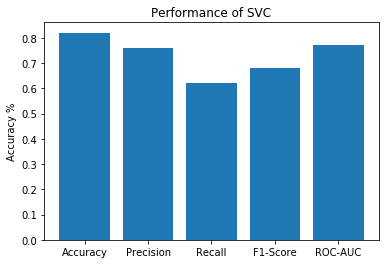

In [13]:
#Plotting the performance measures
acc_svc = round(accuracy_score(y_test, y_pred_svc),2)
print("Accuracy: " + str(acc_svc))
precision_svc = round(precision_score(y_test, y_pred_svc), 2)
print('Precision Score: ' + str(precision_svc))
recall_svc = round(recall_score(y_test, y_pred_svc),2)
print('Recall Score: ' + str(recall_svc))
f1_svc = round(f1_score(y_test, y_pred_svc),2)
print("F1-Score: " + str(f1_svc))
roc_svc = round(roc_auc_score(y_test, y_pred_svc),2)
print("ROC-AUC Score: " + str(roc_svc))

scores = [acc_svc, precision_svc, recall_svc, f1_svc, roc_svc]
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), labels=['Accuracy','Precision','Recall', 'F1-Score', 'ROC-AUC'])
plt.ylabel('Accuracy %')
plt.title("Performance of SVC")
plt.show()

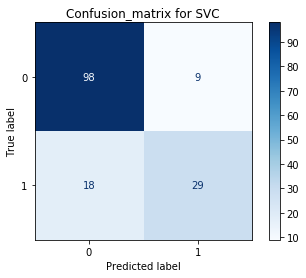

In [14]:
#PLotting the Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_search_svc, x_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion_matrix for SVC')
plt.show()

### Decision Tree

In [15]:
# grid parameters for DecisionTree
grid_param_dt = {
    'max_depth':[3,4,5,6,7],
    'min_samples_split':[2,5,10,15,20],
    'min_samples_leaf':[5,10,15,20],
    'max_leaf_nodes':[5,10,15,20,25]
}

In [16]:
#Building the Decision Tree with best parameters available
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid = grid_param_dt, cv=10, return_train_score=True)
grid_search_dt.fit(x_train, y_train)
y_pred_dt = grid_search_dt.predict(x_test)
print("The Best parameters are: " + str(grid_search_dt.best_params_)+'\n')
print("The Best grid search score (mean of cross_val_score of best estimator): " + str(grid_search_dt.best_score_)+'\n')
print("The score of the best estimator: " + str(grid_search_dt.score(x_test, y_test))+'\n')
print("The best estimator selected by grid search: \n" + str(grid_search_dt.best_estimator_))

The Best parameters are: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}

The Best grid search score (mean of cross_val_score of best estimator): 0.7377578001057641

The score of the best estimator: 0.7792207792207793

The best estimator selected by grid search: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy: 0.78
Precision Score: 0.72
Recall Score: 0.45
F1-Score: 0.55
ROC-AUC Score: 0.69


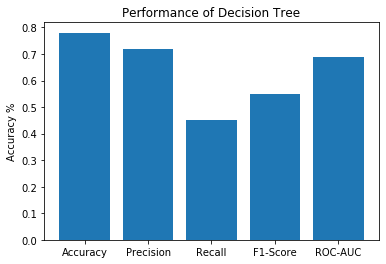

In [17]:
#Plotting the performance measure
acc_dt = round(accuracy_score(y_test, y_pred_dt),2)
print("Accuracy: " + str(acc_dt))
precision_dt = round(precision_score(y_test, y_pred_dt), 2)
print('Precision Score: ' + str(precision_dt))
recall_dt = round(recall_score(y_test, y_pred_dt),2)
print('Recall Score: ' + str(recall_dt))
f1_dt = round(f1_score(y_test, y_pred_dt),2)
print("F1-Score: " + str(f1_dt))
roc_dt = round(roc_auc_score(y_test, y_pred_dt),2)
print("ROC-AUC Score: " + str(roc_dt))

scores = [acc_dt, precision_dt, recall_dt, f1_dt, roc_dt]
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), labels=['Accuracy','Precision','Recall', 'F1-Score', 'ROC-AUC'])
plt.ylabel('Accuracy %')
plt.title("Performance of Decision Tree")
plt.show()

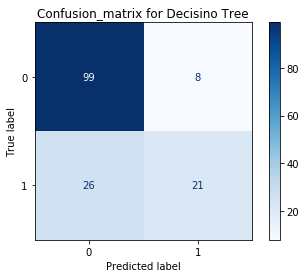

In [18]:
#PLotting the confusion matrix
plot_confusion_matrix(grid_search_dt, x_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion_matrix for Decisino Tree')
plt.show()

### Guassian Nayes Bayes

The Guassian Nayes Bayes method does not take parameters while building the model, so we will not use grid search method for this algorithm

In [19]:
# For GuassianNB
from sklearn.model_selection import cross_val_score
nb = GaussianNB()
cross_val = cross_val_score(nb,x,y, cv=10)
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
print("The scores returned by the cross validation: " + str(cross_val)+ '\n')
print("The generalized score of the cross_val: " + str(np.mean(cross_val)))
print("The score of the train accuracy: " + str(nb.score(x_train, y_train))+'\n')


The scores returned by the cross validation: [0.72727273 0.75324675 0.79220779 0.71428571 0.71428571 0.79220779
 0.76623377 0.80519481 0.72368421 0.77631579]

The generalized score of the cross_val: 0.7564935064935066
The score of the train accuracy: 0.757328990228013



Accuracy: 0.76
Precision Score: 0.67
Recall Score: 0.62
F1-Score: 0.64
ROC-AUC Score: 0.74


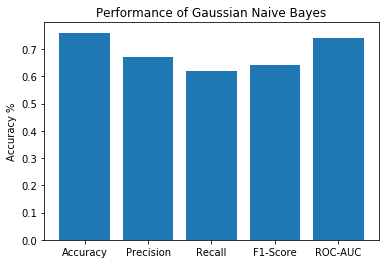

In [20]:
#Plotting the performance measure of Gaussin Naive Bayes
acc_nb = round(np.mean(cross_val),2)
print("Accuracy: " + str(acc_nb))
precision_nb = round(precision_score(y_test, y_pred_nb), 2)
print('Precision Score: ' + str(precision_nb))
recall_nb = round(recall_score(y_test, y_pred_nb),2)
print('Recall Score: ' + str(recall_nb))
f1_nb = round(f1_score(y_test, y_pred_nb),2)
print("F1-Score: " + str(f1_nb))
roc_nb = round(roc_auc_score(y_test, y_pred_nb),2)
print("ROC-AUC Score: " + str(roc_nb))

scores = [acc_nb, precision_nb, recall_nb, f1_nb, roc_nb]
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), labels=['Accuracy','Precision','Recall', 'F1-Score', 'ROC-AUC'])
plt.ylabel('Accuracy %')
plt.title("Performance of Gaussian Naive Bayes")
plt.show()

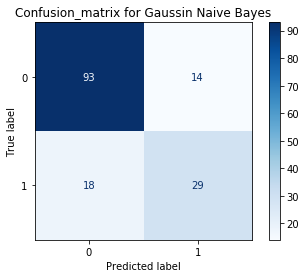

In [21]:
#Plotting the confusion matrix
plot_confusion_matrix(nb, x_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion_matrix for Gaussin Naive Bayes')
plt.show()

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
n_est = np.arange(5,12,2)
for i in n_est:
    rf = RandomForestClassifier(n_estimators=i, random_state=860)
    cross_score = cross_val_score(rf,x_train, y_train, cv=10)
    print("For the model with n_estimators: " + str(i))
    print("The cross validation score for each fold is: " + str(cross_score))
    print("The mean of cross validation score: " + str(np.mean(cross_score)) + '\n')

For the model with n_estimators: 5
The cross validation score for each fold is: [0.66129032 0.69354839 0.66129032 0.80645161 0.73770492 0.70491803
 0.70491803 0.62295082 0.68852459 0.73770492]
The mean of cross validation score: 0.7019301956636701

For the model with n_estimators: 7
The cross validation score for each fold is: [0.70967742 0.67741935 0.72580645 0.77419355 0.73770492 0.7704918
 0.68852459 0.63934426 0.68852459 0.72131148]
The mean of cross validation score: 0.7132998413537811

For the model with n_estimators: 9
The cross validation score for each fold is: [0.72580645 0.66129032 0.75806452 0.82258065 0.72131148 0.78688525
 0.68852459 0.63934426 0.72131148 0.73770492]
The mean of cross validation score: 0.7262823902696984

For the model with n_estimators: 11
The cross validation score for each fold is: [0.74193548 0.69354839 0.77419355 0.80645161 0.72131148 0.78688525
 0.68852459 0.67213115 0.73770492 0.78688525]
The mean of cross validation score: 0.7409571655208883



In [23]:
param_grid = {
    'max_depth':[3,4,5],
    'max_leaf_nodes':[10,15,20],
    'min_samples_leaf':[10,15,20,25]
}
rf_best = RandomForestClassifier(n_estimators=11, random_state=860)
grid_search = GridSearchCV(rf_best, param_grid, cv=10, return_train_score=True)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
print("The Best parameters are: " + str(grid_search.best_params_)+'\n')
print("The Best grid search score (mean of cross_val_score of best estimator): " + str(grid_search.best_score_)+'\n')
print("The score of the best estimator: " + str(grid_search.score(x_test, y_test))+'\n')
print("The best estimator selected by grid search: " + str(grid_search.best_estimator_))

The Best parameters are: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 15}

The Best grid search score (mean of cross_val_score of best estimator): 0.7621628767847699

The score of the best estimator: 0.8051948051948052

The best estimator selected by grid search: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=860,
                       verbose=0, warm_start=False)


Accuracy: 0.81
Precision Score: 0.74
Recall Score: 0.55
F1-Score: 0.63
ROC-AUC Score: 0.73


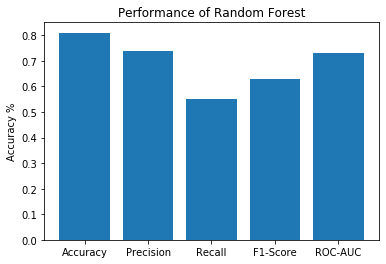

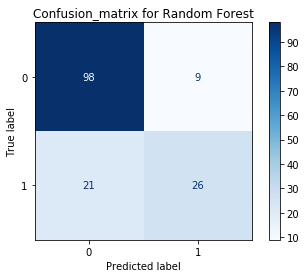

In [24]:
#Plotting the performance measure
acc_rf = round(accuracy_score(y_test, y_pred),2)
print("Accuracy: " + str(acc_rf))
precision_rf = round(precision_score(y_test, y_pred), 2)
print('Precision Score: ' + str(precision_rf))
recall_rf = round(recall_score(y_test, y_pred),2)
print('Recall Score: ' + str(recall_rf))
f1_rf = round(f1_score(y_test, y_pred),2)
print("F1-Score: " + str(f1_rf))
roc_rf = round(roc_auc_score(y_test, y_pred),2)
print("ROC-AUC Score: " + str(roc_rf))

scores = [acc_rf, precision_rf, recall_rf, f1_rf, roc_rf]
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), labels=['Accuracy','Precision','Recall', 'F1-Score', 'ROC-AUC'])
plt.ylabel('Accuracy %')
plt.title("Performance of Random Forest")
plt.show()

#Plotting the confusion matrix
plot_confusion_matrix(grid_search, x_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion_matrix for Random Forest')
plt.show()

### XGBoost Classifier

In [25]:
from xgboost import XGBClassifier
for i in n_est:
    xgb = XGBClassifier(n_estimators= i, random_state=860)
    cross_score_xg = cross_val_score(xgb,x_train, y_train, cv=10)
    print("For the model with n_estimators: " +str(i))
    print("The cross validation score for each fold is: " + str(cross_score_xg))
    print("The mean of cross validation score: " + str(np.mean(cross_score_xg)) + '\n')

For the model with n_estimators: 5
The cross validation score for each fold is: [0.66129032 0.72580645 0.80645161 0.83870968 0.70491803 0.80327869
 0.73770492 0.68852459 0.75409836 0.75409836]
The mean of cross validation score: 0.74748810153358

For the model with n_estimators: 7
The cross validation score for each fold is: [0.69354839 0.72580645 0.80645161 0.83870968 0.70491803 0.80327869
 0.73770492 0.68852459 0.73770492 0.7704918 ]
The mean of cross validation score: 0.750713907985193

For the model with n_estimators: 9
The cross validation score for each fold is: [0.69354839 0.72580645 0.83870968 0.82258065 0.73770492 0.80327869
 0.72131148 0.68852459 0.75409836 0.7704918 ]
The mean of cross validation score: 0.7556054997355897

For the model with n_estimators: 11
The cross validation score for each fold is: [0.67741935 0.72580645 0.83870968 0.82258065 0.73770492 0.78688525
 0.70491803 0.68852459 0.75409836 0.75409836]
The mean of cross validation score: 0.7490745637228979



In [26]:
xgb_best = XGBClassifier(n_estimators=9, random_state=860)
grid_search_xgb = GridSearchCV(xgb_best, param_grid, cv=10, return_train_score=True)
grid_search_xgb.fit(x_train, y_train)
y_pred = grid_search_xgb.predict(x_test)
print("The Best parameters are: " + str(grid_search_xgb.best_params_)+'\n')
print("The Best grid search score (mean of cross_val_score of best estimator): " + str(grid_search_xgb.best_score_)+'\n')
print("The score of the best estimator: " + str(grid_search_xgb.score(x_test, y_test))+'\n')
print("The best estimator selected by grid search: \n" + str(grid_search_xgb.best_estimator_))

The Best parameters are: {'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_leaf': 10}

The Best grid search score (mean of cross_val_score of best estimator): 0.7556054997355897

The score of the best estimator: 0.7792207792207793

The best estimator selected by grid search: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              max_leaf_nodes=10, min_child_weight=1, min_samples_leaf=10,
              missing=None, n_estimators=9, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=860, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)


Accuracy: 0.78
Precision Score: 0.67
Recall Score: 0.55
F1-Score: 0.6
ROC-AUC Score: 0.72


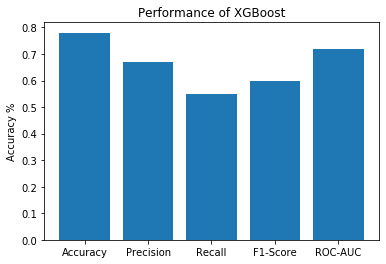

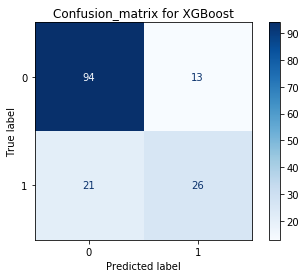

In [27]:
#Plotting the performance measure
acc_xg = round(accuracy_score(y_test, y_pred),2)
print("Accuracy: " + str(acc_xg))
precision_xg = round(precision_score(y_test, y_pred), 2)
print('Precision Score: ' + str(precision_xg))
recall_xg = round(recall_score(y_test, y_pred),2)
print('Recall Score: ' + str(recall_xg))
f1_xg = round(f1_score(y_test, y_pred),2)
print("F1-Score: " + str(f1_xg))
roc_xg = round(roc_auc_score(y_test, y_pred),2)
print("ROC-AUC Score: " + str(roc_xg))

scores = [acc_xg, precision_xg, recall_xg, f1_xg, roc_xg]
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), labels=['Accuracy','Precision','Recall', 'F1-Score', 'ROC-AUC'])
plt.ylabel('Accuracy %')
plt.title("Performance of XGBoost")
plt.show()

#Plotting the confusion matrix
plot_confusion_matrix(grid_search_xgb, x_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion_matrix for XGBoost')
plt.show()

### Comparing the performance of all models

In [28]:
models=['SVC', 'Decision Tree', 'GaussianNB', "Random Forest", "XGBoost"]
scores=[acc_svc, acc_dt, acc_nb, acc_rf, acc_xg]
recalls=[recall_svc, recall_dt, recall_nb, recall_rf, recall_xg]
pscores=[precision_svc,precision_dt,precision_nb, precision_rf, precision_xg]
f1=[f1_svc,f1_dt,f1_nb, f1_rf, f1_xg]
roc=[roc_svc,roc_dt,roc_nb, roc_rf, roc_xg]
Accuracy_df = pd.DataFrame(
    {
        "Model":models,
        "Accurary %":scores,
        "Recall": recalls,
        "Precision": pscores,
        "F-Measure":f1,
        "ROC":roc
        
    }
)
Accuracy_df

,Model,Accurary %,Recall,Precision,F-Measure,ROC
0,SVC,0.82,0.62,0.76,0.68,0.77
1,Decision Tree,0.78,0.45,0.72,0.55,0.69
2,GaussianNB,0.76,0.62,0.67,0.64,0.74
3,Random Forest,0.81,0.55,0.74,0.63,0.73
4,XGBoost,0.78,0.55,0.67,0.60,0.72


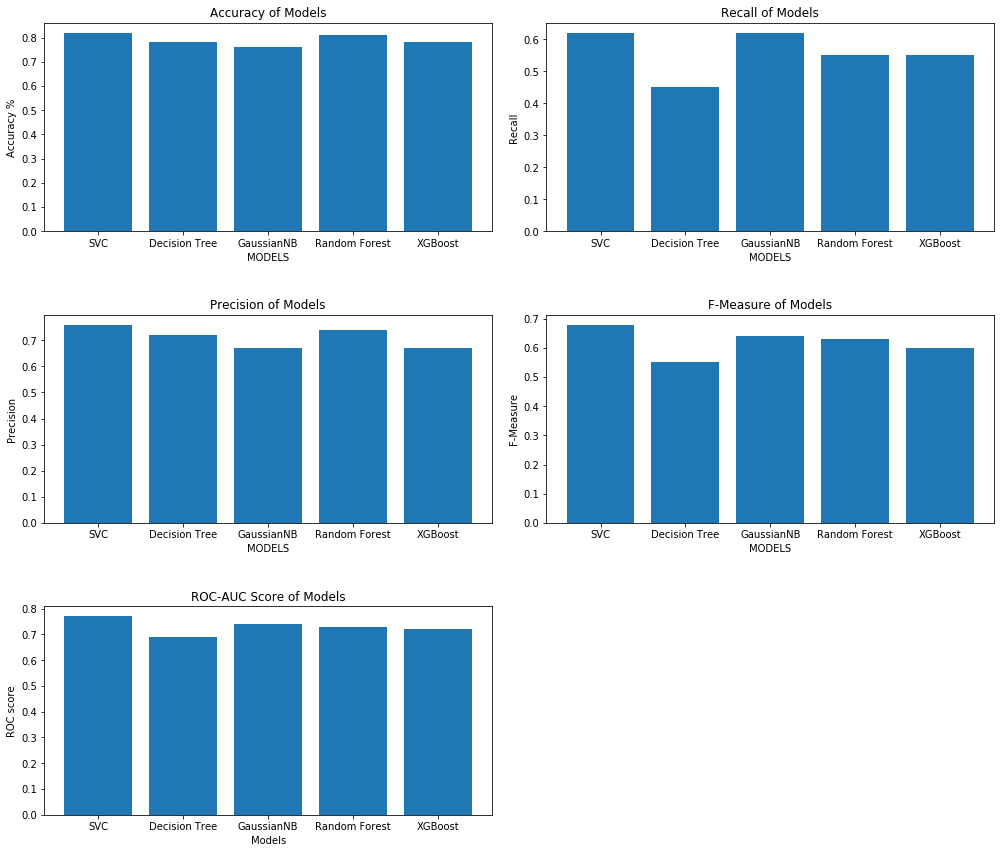

In [32]:
plt.figure()

plt.subplot(321)
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), labels=models)
plt.xlabel('MODELS')
plt.ylabel('Accuracy %')
plt.title("Accuracy of Models")

plt.subplot(322)
plt.bar(range(len(recalls)), recalls)
plt.xticks(range(len(recalls)), labels=models)
plt.xlabel('MODELS')
plt.ylabel('Recall')
plt.title("Recall of Models")

plt.subplot(323)
plt.bar(range(len(pscores)), pscores)
plt.xticks(range(len(pscores)), labels=models)
plt.xlabel('MODELS')
plt.ylabel('Precision')
plt.title("Precision of Models")

plt.subplot(324)
plt.bar(range(len(f1)), f1)
plt.xticks(range(len(f1)), labels=models)
plt.xlabel('MODELS')
plt.ylabel('F-Measure')
plt.title("F-Measure of Models")

plt.subplot(325)
plt.bar(range(len(roc)), roc)
plt.xticks(range(len(roc)), labels=models)
plt.xlabel('Models')
plt.ylabel('ROC score')
plt.title("ROC-AUC Score of Models")

plt.subplots_adjust(top=2.5, bottom=-0.25, left=0, right=2.2, hspace=0.4,
                    wspace=0.12)
plt.savefig('performance measure.png',dpi=300, bbox_inches='tight')
plt.show()


##### Plotting the ROC Curve of Each Model

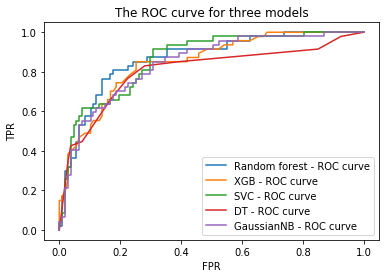

In [33]:
from sklearn.metrics import roc_curve
fpr_svc, tpr_svc, t= roc_curve(y_test, grid_search_svc.decision_function(x_test))
fpr_dt, tpr_dt, t = roc_curve(y_test, grid_search_dt.predict_proba(x_test)[:,1])
fpr_nb, tpr_nb, t = roc_curve(y_test, nb.predict_proba(x_test)[:,1])
fpr_rf, tpr_rf, t= roc_curve(y_test, grid_search.predict_proba(x_test)[:,1])
fpr_xg, tpr_xg, t = roc_curve(y_test, grid_search_xgb.predict_proba(x_test)[:,1])

plt.plot(fpr_rf, tpr_rf, label = "Random forest - ROC curve")
plt.plot(fpr_xg, tpr_xg, label = "XGB - ROC curve")
plt.plot(fpr_svc, tpr_svc, label = "SVC - ROC curve")
plt.plot(fpr_dt, tpr_dt, label = "DT - ROC curve")
plt.plot(fpr_nb, tpr_nb, label = "GaussianNB - ROC curve")
plt.title('The ROC curve for three models')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

plt.savefig('roc.png',dpi=300, bbox_inches='tight')
plt.show()

## Conclusion :

- We trained SVC, DecisionTree, Random Forest, XGBoost using the GridSearchCV with internal 10 fold cross validation to find the best model using different parameters and Gaussin Naive Bayes with 10 folds cross validation to get a generalized score.
- For measuring the performance of these models we used various mesures such as Accuracy, Precision, Recall, F-Measures and ROC which one can see in the table above the plots.
- As it is clearly visible that all three models works similar for this dataset. So the best suprvised Machine Learning algorithm is Support Vector Classifier (SVC) with the 82% accuracy and 0.76 Precision on test dataset in respective to other data models for this experiment.
- The results we have obtained are within the range expected in the project proposal (75-80%), which is a good indicator as we have got results in the upper bound of expected range.
-  we conclude During this experiment, we learn diffrent classification methods and ensemble methods and evalute them on various measures.